### Introduction

This notebook presents an in-depth analysis of urban mobility patterns and behaviors within the city of Yerevan, <br>
leveraging GPS data. Through various methodologies and techniques, we explore the distribution of position fixes within <br>
designated areas, analyze temporal variations in movement patterns, and investigate travel behaviors. Additionally, the <br> 
analysis includes an examination of parking behavior based on the density of points within predefined polygons. By uncovering <br>
insights into mobility dynamics, this analysis aims to inform urban planning strategies and transportation policies for the city.

In [2]:
import pandas as pd
import trackintel as ti
import warnings

import lib.process as prcs
import lib.density_analysis as da

warnings.filterwarnings("ignore")

### 1. Preparation of Data

Here we collectively handle the pre-processing of GPS data for analysis. Initially, the raw position fixes data is loaded from <br>
a `CSV file`, ensuring proper parsing and interpretation of parameters such as separator, timezone, and coordinate reference system. <br>
Subsequently, the data undergoes spatial filtering to retain only the points falling within predefined polygons (red lines), ensuring <br> 
relevance to the analysis area. Following this, the filtered data is further processed to enhance cleanliness and efficiency, with any <br>
necessary adjustments made before saving the cleaned data to a new `CSV file`. Finally, the cleaned data is read back into the notebook, <br>
ensuring consistency, and completeness of the preprocessing steps. THerefore, we have positionfixes that are inside the Yerevan and <br>
positionfixes that are inside the red line polygons with a certain buffer `(0.5 meter by default)`.

In [2]:
# Read the positionfixes extracted from the sample data
pfs = ti.io.read_positionfixes_csv('./data/positionfixes.csv', sep=",", tz='UTC', index_col=0, crs=prcs.CRS.from_epsg(4326))

In [3]:
# Read the positionfixes extracted from the sample data
pfs = da.filter_points_inside_polygons(pfs)
pfs.reset_index(drop=True, inplace=True)

# Clean and save the positionfixes that lie inside/around the red lines 
pfs = da.break_geometry_points(pfs)
pfs.to_csv('./data/rl_positionfixes.csv')

In [3]:
# Read the overall clean positionfixes
pfs = ti.io.read_positionfixes_csv('./data/positionfixes.csv', sep=",", tz='UTC', index_col=0, crs=prcs.CRS.from_epsg(4326))

# Read the positionfixes that lie inside the red lines
pfs_rl = ti.io.read_positionfixes_csv('./data/rl_positionfixes.csv', sep=",", tz='UTC', index_col=0, crs=prcs.CRS.from_epsg(4326))

### 2. Visualizing Monthly Percentage of Position Fixes Inside Red Lines
This section visualizes the percentage of position fixes that fall within the predefined red lines polygons, with a <br>
0.5 meters margin, on a monthly basis. The data is grouped by months for both the overall position fixes `(pfs)` and the <br>
position fixes within the red lines `(pfs_rl)`. The resulting percentages are then plotted for comparison across different <br>
years (2019 to 2022). Each subplot represents a year, with the x-axis denoting the month and the y-axis representing the <br>
percentage of position fixes within the red lines. This visualization offers insights into how the distribution of position <br>
fixes within the red lines varies over different months and years.

In [5]:
pfsm = da.group_pfs_by_months(pfs)
pfs_rlm = da.group_pfs_by_months(pfs_rl)

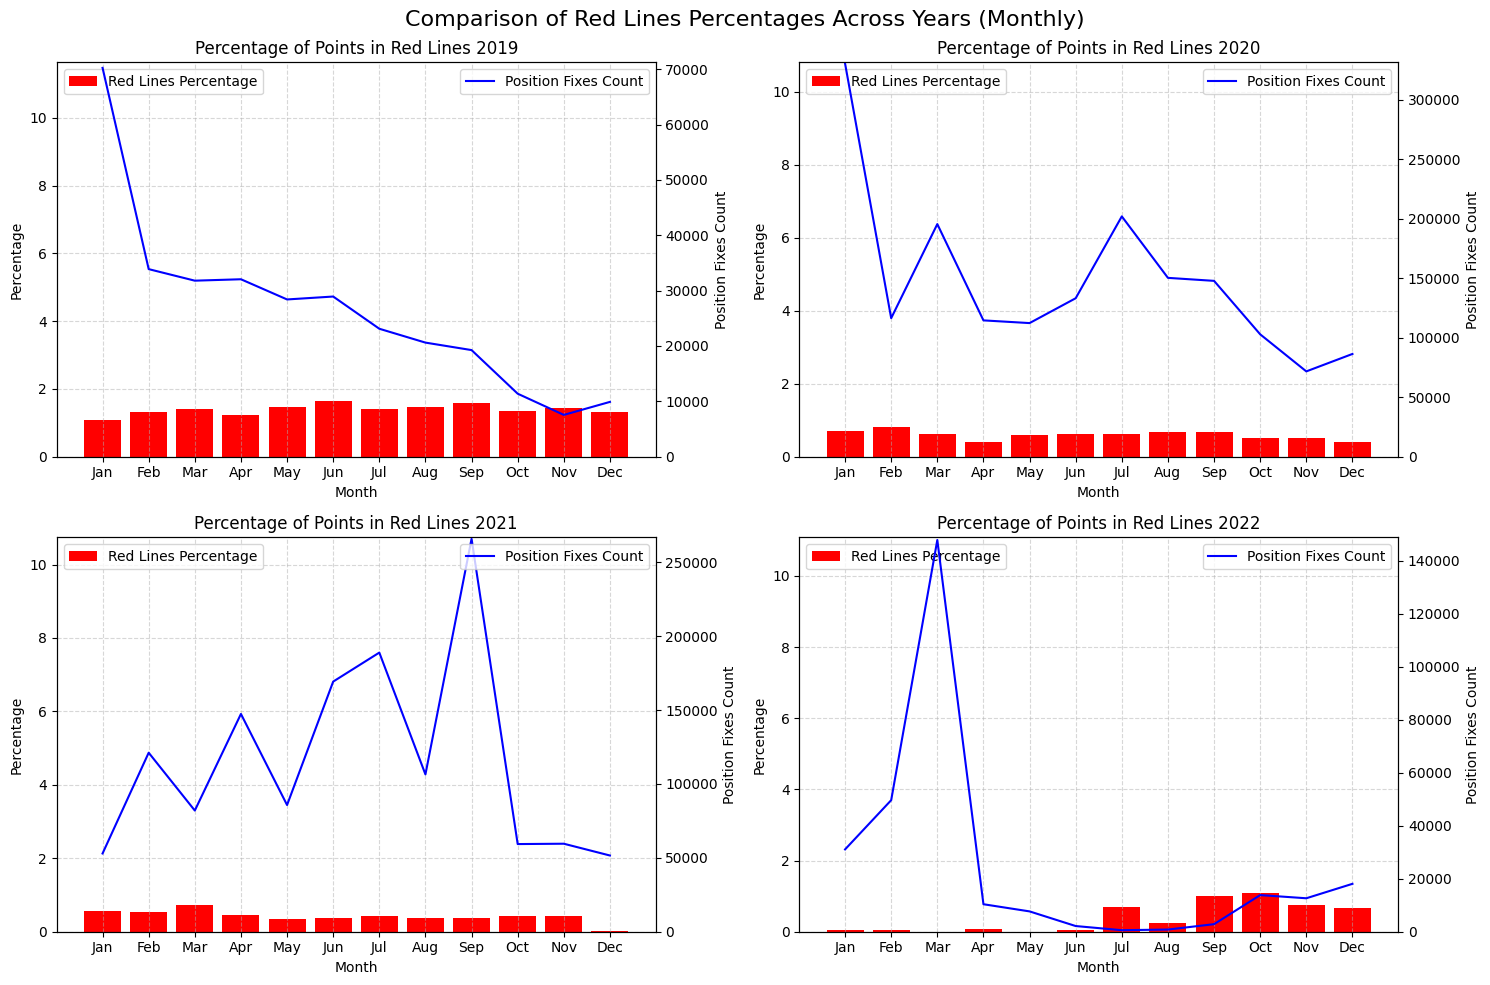

In [6]:
pfsm_list = [pfsm[0:12], pfsm[12:24], pfsm[24:36], pfsm[36:48]]
pfs_rlm_list = [pfs_rlm[0:12], pfs_rlm[12:24], pfs_rlm[24:36], pfs_rlm[36:48]]

titles_list = [
    'Percentage of Points in Red Lines 2019', 
    'Percentage of Points in Red Lines 2020', 
    'Percentage of Points in Red Lines 2021', 
    'Percentage of Points in Red Lines 2022'
]

da.graph_subplots(pfs_data=pfsm_list, rl_data=pfs_rlm_list, 
                  titles_list=titles_list, graph_func=da.monthly_percentage_graph, 
                  x_lable='Month', y_lable='Percentage', 
                  suptitle='Comparison of Red Lines Percentages Across Years (Monthly)')


### 3. Visualizing Weekly Percentage of Position Fixes Inside Red Lines
This section visualizes the percentage of position fixes that fall within the predefined red lines polygons, with a <br>
0.5 meters margin, on a weekly basis. The data is grouped by weeks for both the overall position fixes `(pfs)` and the position <br>
fixes within the red lines `(pfs_rl)`. The resulting percentages are then plotted for comparison across different years (2019 to 2022). <br>
Each subplot represents a year, with the x-axis denoting the week number and the y-axis representing the percentage of position fixes <br>
within the red lines. This visualization provides insights into the weekly variations in the distribution of position fixes within the <br>
red lines over different years.

In [7]:
pfsw = da.group_pfs_by_weeks(pfs)
pfs_rlw = da.group_pfs_by_weeks(pfs_rl)

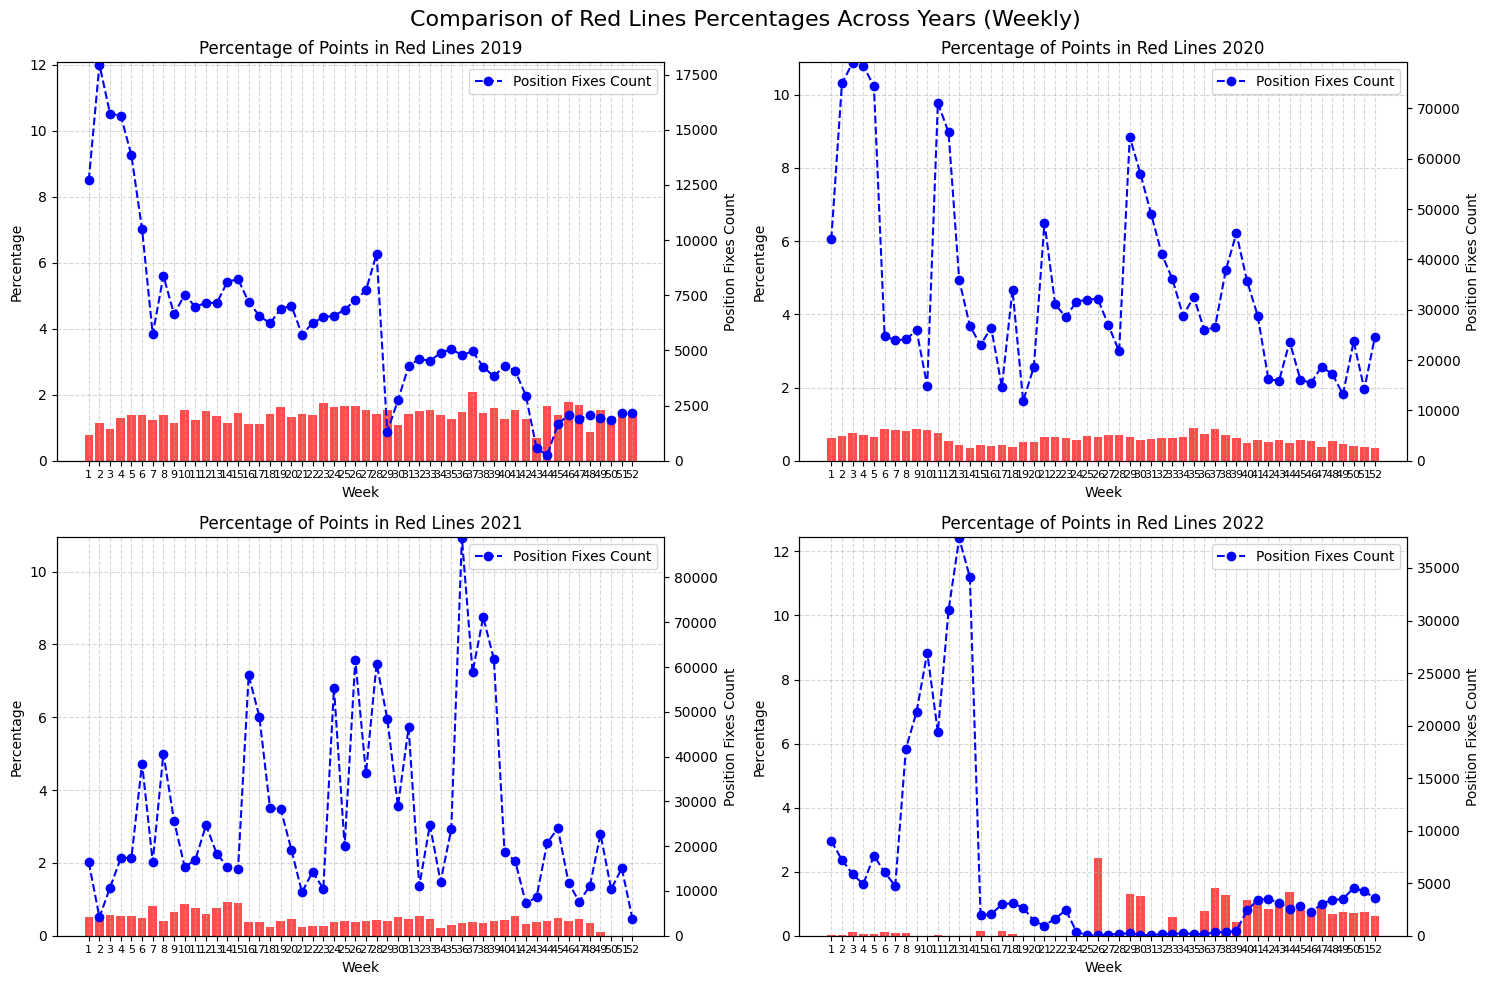

In [8]:
pfsw_list = [pfsw[0:52], pfsw[52:104], pfsw[104:156], pfsw[156:208]]
pfs_rlw_list = [pfs_rlw[0:52], pfs_rlw[52:104], pfs_rlw[104:156], pfs_rlw[156:208]]

titles_list = [
    'Percentage of Points in Red Lines 2019', 
    'Percentage of Points in Red Lines 2020', 
    'Percentage of Points in Red Lines 2021', 
    'Percentage of Points in Red Lines 2022'
]

da.graph_subplots(pfs_data=pfsw_list, rl_data=pfs_rlw_list, 
                  titles_list=titles_list, graph_func=da.weekly_percentage_graph, 
                  x_lable='Week', y_lable='Percentage', 
                  suptitle='Comparison of Red Lines Percentages Across Years (Weekly)')


### 4. Visualizing Weekly Percentage of Position Fixes Inside Red Lines by Weekday/Weekend Comparison
This section visualizes the percentage of position fixes that fall within the predefined red lines polygons, with a <br>
0.5 meters margin, on a weekly basis. The data is grouped by weeks for both the overall position fixes `(pfs)` and <br>
the position fixes within the red lines `(pfs_rl)`. The resulting percentages are then plotted for comparison across <br>
different years (2019 to 2022). Each subplot represents a year, with the x-axis denoting the week number and the y-axis <br>
representing the percentage of position fixes within the red lines. Additionally, the weekdays' and weekends' percentages <br>
are compared within each subplot, providing insights into the distribution of position fixes within the red lines based on <br>
the day of the week. This visualization facilitates a comparison of weekday and weekend mobility patterns within the specified<br>
 areas over different years.

In [9]:
pfsw = da.group_pfs_by_weeks(pfs)
pfs_rlw = da.group_pfs_by_weeks(pfs_rl)

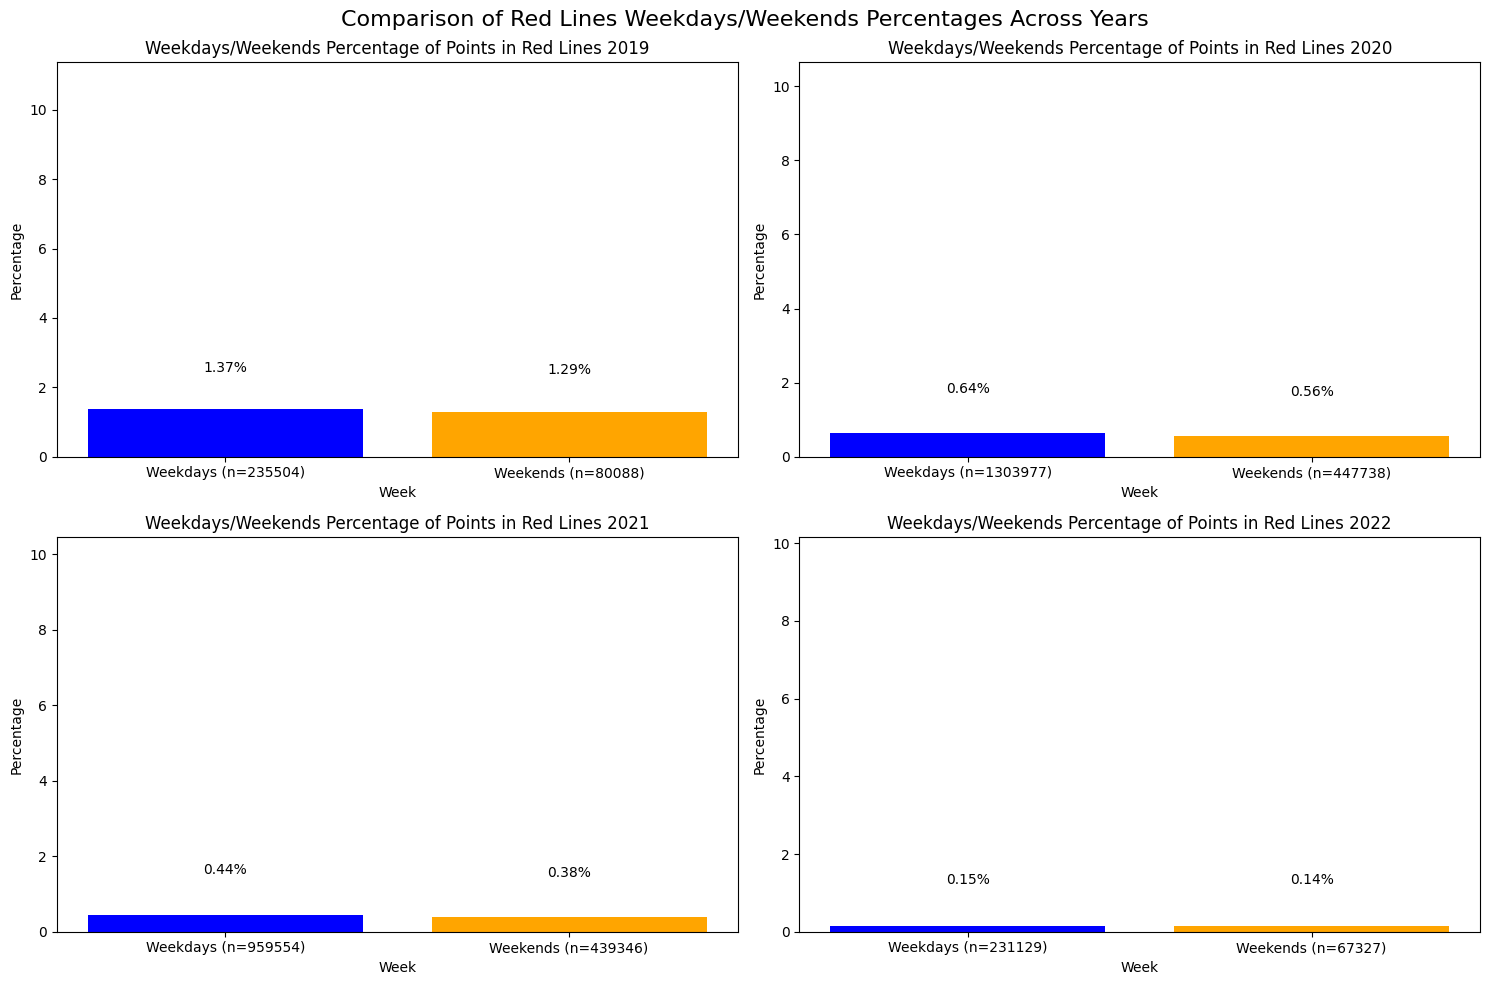

In [10]:
pfsw_list = [pd.concat(pfsw[0:52]), pd.concat(pfsw[52:104]), pd.concat(pfsw[104:156]), pd.concat(pfsw[156:208])]
pfs_rlw_list = [pd.concat(pfs_rlw[0:52]), pd.concat(pfs_rlw[52:104]), pd.concat(pfs_rlw[104:156]), pd.concat(pfs_rlw[156:208])]

titles_list = [
    'Weekdays/Weekends Percentage of Points in Red Lines 2019', 
    'Weekdays/Weekends Percentage of Points in Red Lines 2020', 
    'Weekdays/Weekends Percentage of Points in Red Lines 2021', 
    'Weekdays/Weekends Percentage of Points in Red Lines 2022'
]

da.graph_subplots(pfs_data=pfsw_list, rl_data=pfs_rlw_list, 
                  titles_list=titles_list, graph_func=da.weekdays_percentage_graph, 
                  x_lable='Week', y_lable='Percentage', 
                  suptitle='Comparison of Red Lines Weekdays/Weekends Percentages Across Years')

### 5. Exploring Distribution of Duration and Distance between Consecutive Points
This section delves into the exploration of duration and distance distributions between consecutive points captured by individual devices <br>
and grouped by date. After retrieving segments from the cleaned dataset, which comprises approximately 530,000 position fixes, the data is <br>
converted into a GeoDataFrame for spatial analysis. The primary focus lies on visualizing the distribution of durations between consecutive <br>
points, aiding in the comprehension of temporal patterns and movement frequencies. Duration is depicted in minutes to enhance interpretability. <br>
Accompanying this visualization are summary statistics, including mean, median, mode, quartiles, minimum, and maximum duration values, providing <br>
a comprehensive insight into the temporal distribution dynamics. Further analyses are anticipated to expand understanding of the spatial dynamics <br>
captured within the dataset.

In [45]:
import geopandas as gpd
from shapely.wkt import loads

# Retriving the segment by daily basis for distance and duration distribution analysis
segments = pd.read_csv('./data/segments.csv') # Segments of cleaned points => 530K pfs
segments = segments.loc[:, ~segments.columns.str.contains('^Unnamed')]

# Making segments a GeoDataFrame
segments['geom'] = segments['geom'].apply(loads)
segments = gpd.GeoDataFrame(segments, geometry='geom', crs=prcs.CRS.from_epsg(4326))

#### 5.1 Visualizing the Distribution and Statistics of Durations
The first step in analyzing the duration of a process is to visualize the distribution of durations. The distribution of <br>
durations can be visualized using a histogram. The boxplot is also added for a better understanding of situation. Statistics <br>
of the distribution are presented below.


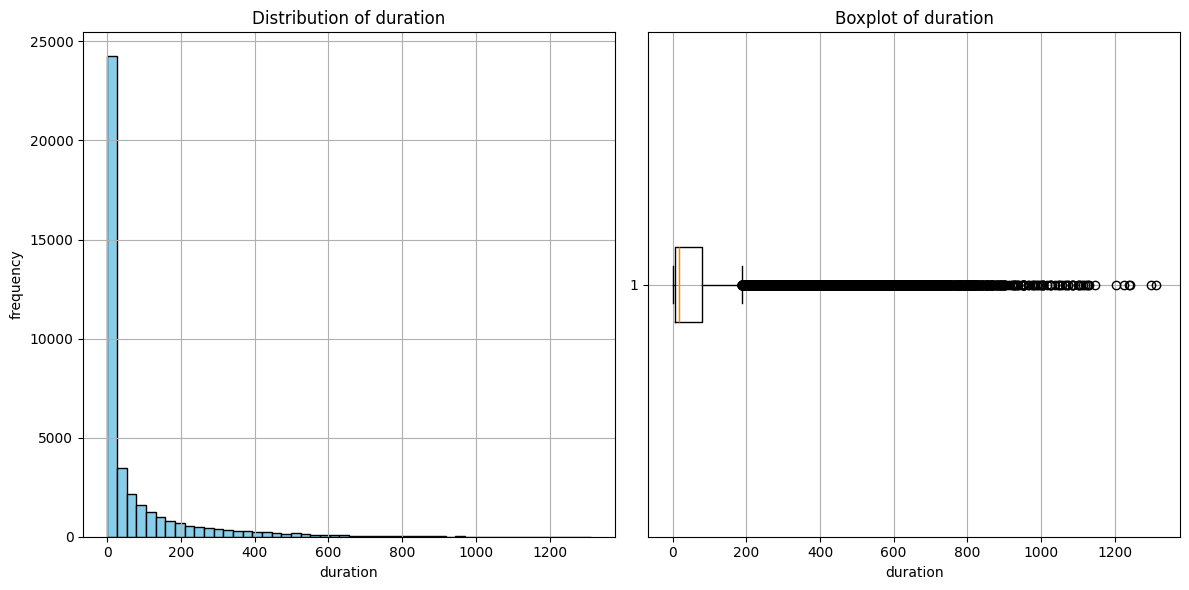

Summary Statistics:

Mean duration: 77.6
Median duration: 17.517
Mode duration: 0.0

10% Quartile: 1.417
25% Quartile (Q1): 6.033
50% Quartile (Q2 or Median): 17.517
75% Quartile (Q3): 78.983
90% Quartile: 242.633

Minimum duration: 0.0
Maximum duration: 1311.533


In [4]:
# Visulaizing the distribution of durations and statistics
da.distribution(df=segments, col_name='duration', minutes=True)

#### 5.2 Visualizing the Distribution and Statistics of Distances
The first step in analyzing the distances of a process is to visualize the distribution of distances. The distribution of <br>
distances can be visualized using a histogram. The boxplot is also added for a better understanding of situation. Statistics <br>
of the distribution are presented below.

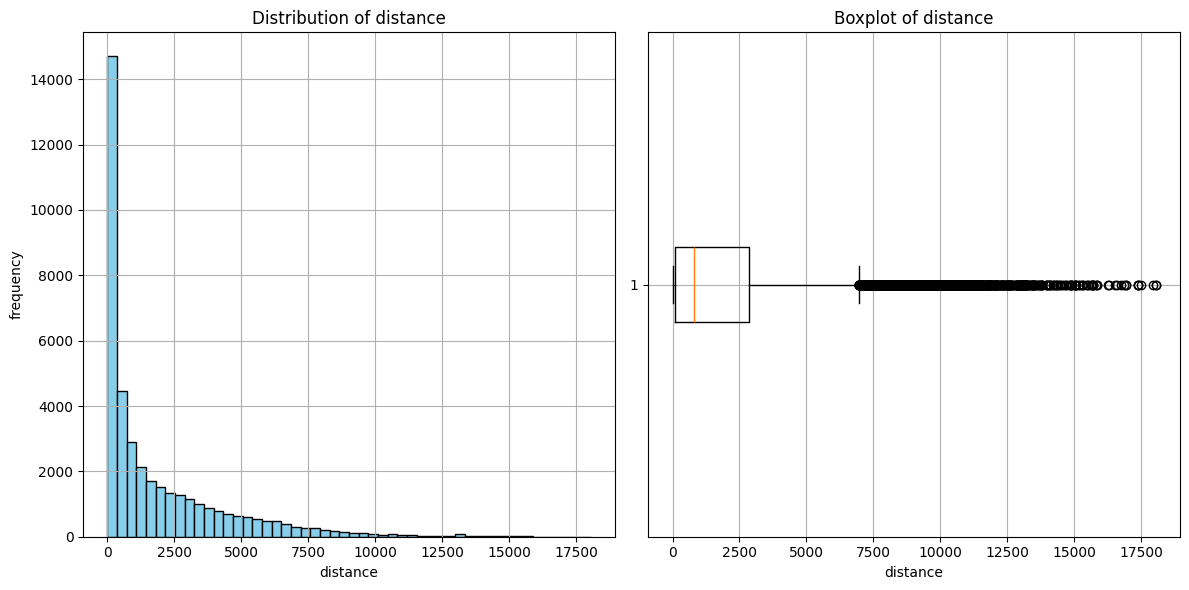

Summary Statistics:

Mean distance: 1893.827
Median distance: 805.745
Mode distance: 0.0

10% Quartile: 0.0
25% Quartile (Q1): 106.642
50% Quartile (Q2 or Median): 805.745
75% Quartile (Q3): 2847.879
90% Quartile: 5482.243

Minimum distance: 0.0
Maximum distance: 18049.4


In [5]:
# Visulaizing the distribution of distances and statistics
da.distribution(df=segments, col_name='distance')

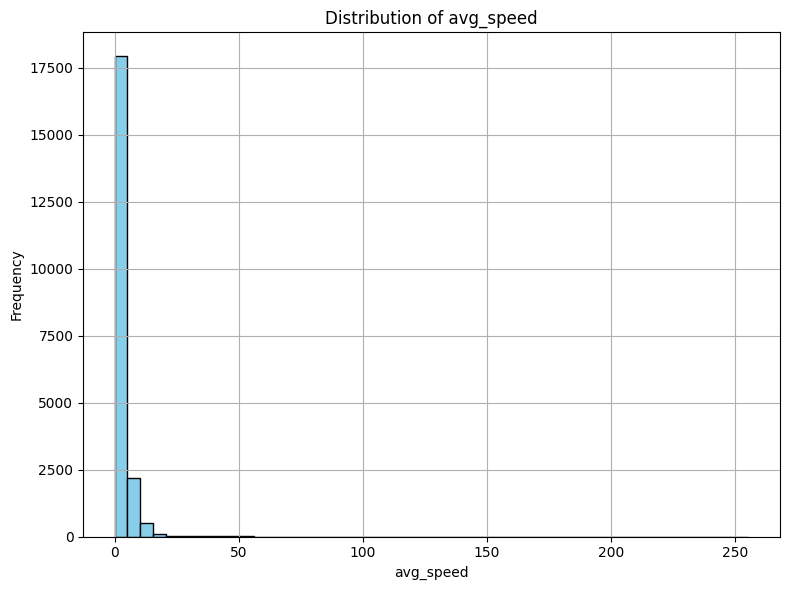

Summary Statistics:

Mean avg_speed: 2.272
Median avg_speed: 0.695
Mode avg_speed: 0.0

10% Quartile: 0.009
25% Quartile (Q1): 0.106
50% Quartile (Q2 or Median): 0.695
75% Quartile (Q3): 2.789
90% Quartile: 6.453

Minimum avg_speed: 0.0
Maximum avg_speed: 255.373


In [60]:
import numpy as np
# Visulaizing the distribution of average speeds and statistics
merged_segments = pd.read_csv('./data/merged_segments.csv')
merged_segments['avg_speed'].replace([np.inf, -np.inf], 0, inplace=True)

da.distribution(df=merged_segments, col_name='avg_speed', boxplot=False)

#### 5.3 Visializing the number of unique people per polygon
We are diving deepwe and extracting people from pfs_rl and then categorizing them by years <br>
after which we are going to plot the bargraph showing the number of people in polygons.

In [4]:
people_rl = prcs.extract_people(pfs_rl)

People Extracted: 100%|██████████| 9065/9065 [00:10<00:00, 901.79it/s] 


In [5]:
from tqdm import tqdm

# Dividing people into Years from 2019 to 2022
pfs_rl_2019 = pfs_rl[pfs_rl['tracked_at'].dt.year == 2019]
pfs_rl_2020 = pfs_rl[pfs_rl['tracked_at'].dt.year == 2020]
pfs_rl_2021 = pfs_rl[pfs_rl['tracked_at'].dt.year == 2021]
pfs_rl_2022 = pfs_rl[pfs_rl['tracked_at'].dt.year == 2022]

people_rl_2019 = prcs.extract_people(pfs_rl_2019)
people_rl_2020 = prcs.extract_people(pfs_rl_2020)
people_rl_2021 = prcs.extract_people(pfs_rl_2021)
people_rl_2022 = prcs.extract_people(pfs_rl_2022)

People Extracted: 100%|██████████| 160/160 [00:00<00:00, 648.20it/s]


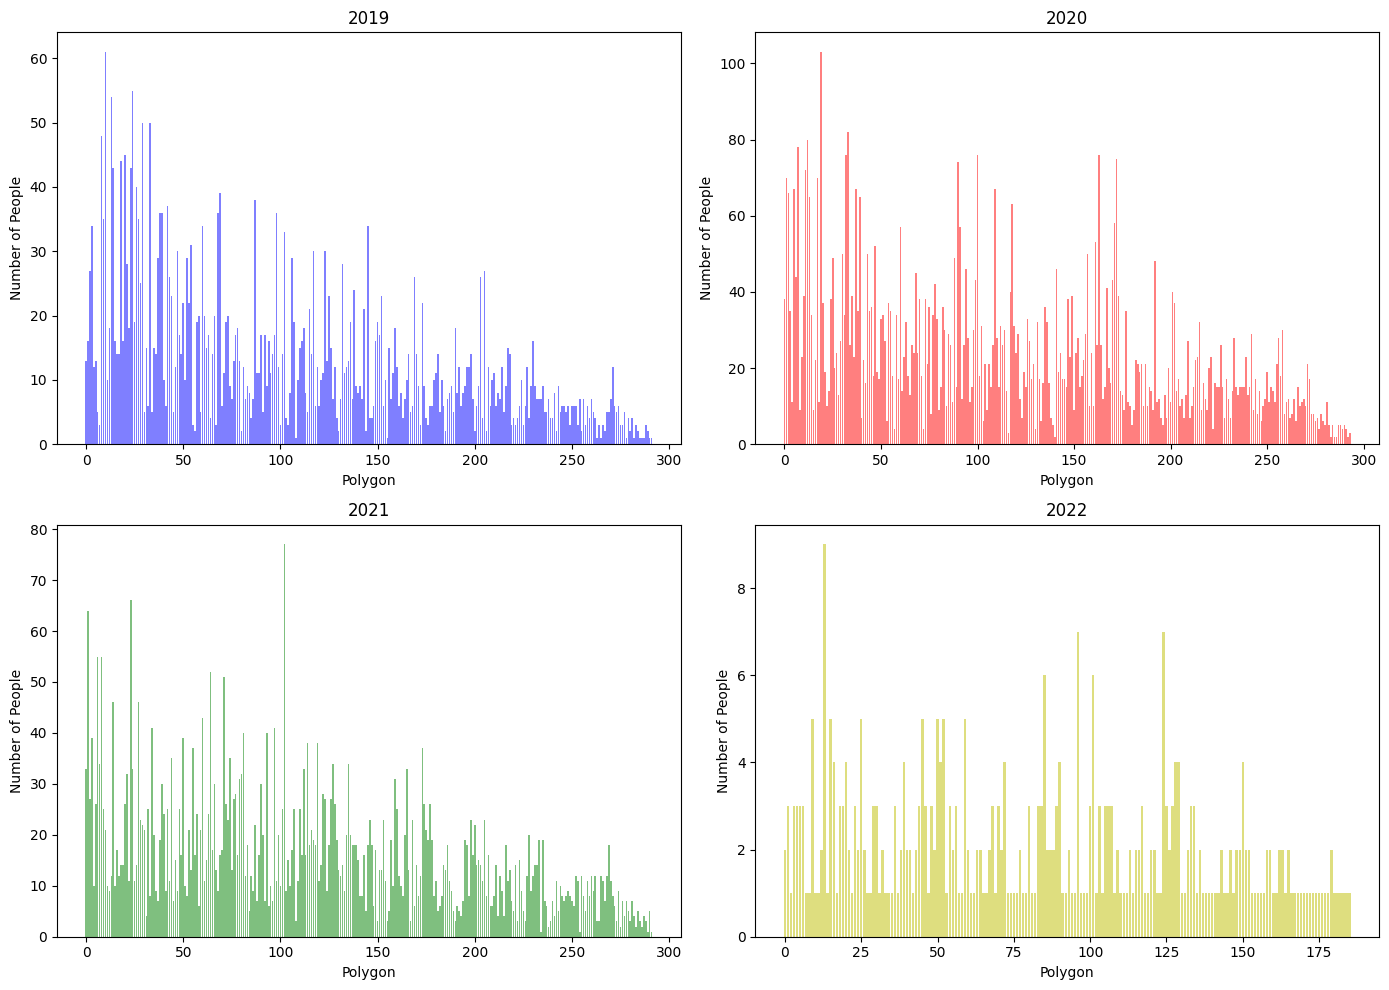

In [55]:
# Calculate counts for all datasets
counts_2019 = da.count_people_in_polygons(people_rl_2019)
counts_2020 = da.count_people_in_polygons(people_rl_2020)
counts_2021 = da.count_people_in_polygons(people_rl_2021)
counts_2022 = da.count_people_in_polygons(people_rl_2022)

# Plotting
da.plt.figure(figsize=(14, 10))

# Plot for people_rl_2019
da.plt.subplot(2, 2, 1)
da.plt.bar(range(len(counts_2019)), counts_2019.values(), color='b', alpha=0.5)
da.plt.xlabel('Polygon')
da.plt.ylabel('Number of People')
da.plt.title('2019')

# Plot for people_rl_2020
da.plt.subplot(2, 2, 2)
da.plt.bar(range(len(counts_2020)), counts_2020.values(), color='r', alpha=0.5)
da.plt.xlabel('Polygon')
da.plt.ylabel('Number of People')
da.plt.title('2020')

# Plot for people_rl_2021
da.plt.subplot(2, 2, 3)
da.plt.bar(range(len(counts_2021)), counts_2021.values(), color='g', alpha=0.5)
da.plt.xlabel('Polygon')
da.plt.ylabel('Number of People')
da.plt.title('2021')

# Plot for people_rl_2022
da.plt.subplot(2, 2, 4)
da.plt.bar(range(len(counts_2022)), counts_2022.values(), color='y', alpha=0.5)
da.plt.xlabel('Polygon')
da.plt.ylabel('Number of People')
da.plt.title('2022')

da.plt.tight_layout()
da.plt.show()


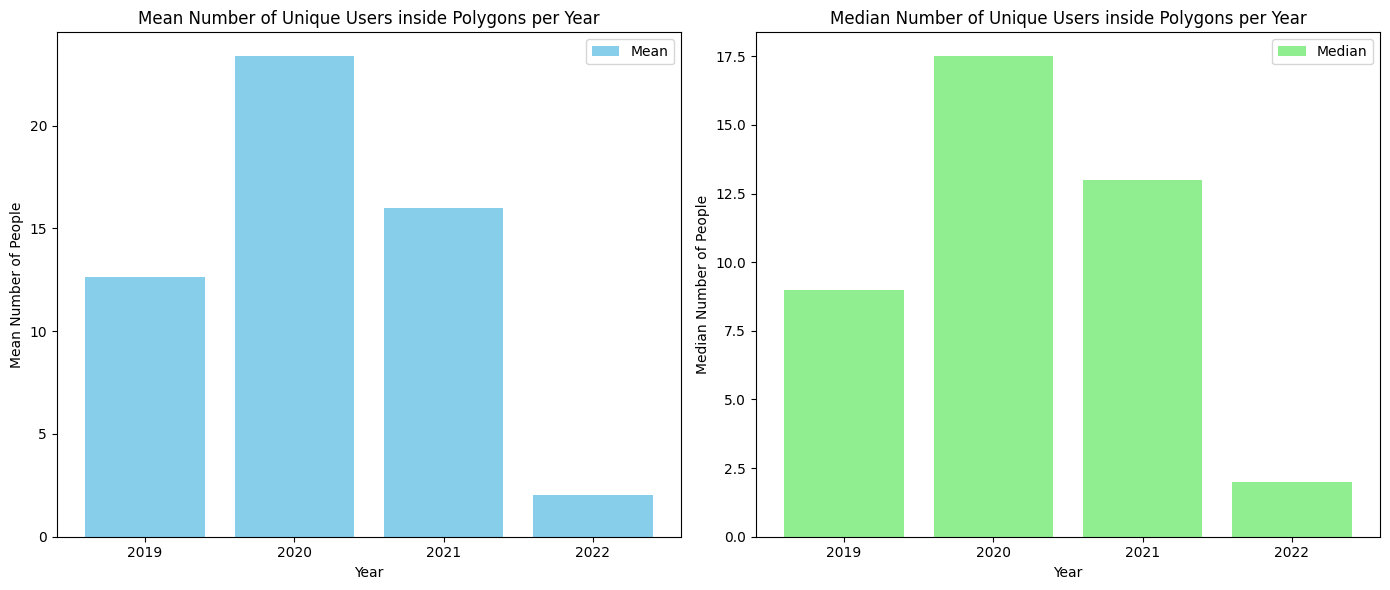

In [57]:
import numpy as np

# Calculate counts for all datasets
counts_2019 = da.count_people_in_polygons(people_rl_2019)
counts_2020 = da.count_people_in_polygons(people_rl_2020)
counts_2021 = da.count_people_in_polygons(people_rl_2021)
counts_2022 = da.count_people_in_polygons(people_rl_2022)

# Compute mean number of unique users inside polygons per year
mean_counts = {
    '2019': np.mean(list(counts_2019.values())),
    '2020': np.mean(list(counts_2020.values())),
    '2021': np.mean(list(counts_2021.values())),
    '2022': np.mean(list(counts_2022.values()))
}

# Compute median number of unique users inside polygons per year
median_counts = {
    '2019': np.median(list(counts_2019.values())),
    '2020': np.median(list(counts_2020.values())),
    '2021': np.median(list(counts_2021.values())),
    '2022': np.median(list(counts_2022.values()))
}

# Plotting mean and median counts
fig, (ax1, ax2) = da.plt.subplots(1, 2, figsize=(14, 6))

# Plot mean counts
ax1.bar(mean_counts.keys(), mean_counts.values(), color='skyblue', label='Mean')
ax1.set_xlabel('Year')
ax1.set_ylabel('Mean Number of People')
ax1.set_title('Mean Number of Unique Users inside Polygons per Year')
ax1.legend()

# Plot median counts
ax2.bar(median_counts.keys(), median_counts.values(), color='lightgreen', label='Median')
ax2.set_xlabel('Year')
ax2.set_ylabel('Median Number of People')
ax2.set_title('Median Number of Unique Users inside Polygons per Year')
ax2.legend()

da.plt.tight_layout()
da.plt.show()


### 6 Understanding the duration distributions
Understanding the duration of time people spend inside red line polygons involves analyzing the distribution of <br>
time intervals during which individuals are present within these designated areas. Having the data provided by that <br>
we can filter people who are not important for us

In [6]:
from tqdm import tqdm
# Calculate Th edurations of a person staying in a polygon per day
durations = []

for person in tqdm(people_rl):
    durations.append(da.calculate_duration(person))

  0%|          | 0/9065 [00:00<?, ?it/s]

100%|██████████| 9065/9065 [01:15<00:00, 119.92it/s]


In [7]:
df = pd.concat(durations, ignore_index=True)

# Set a threshold for parking duration (e.g., 30 minutes)
threshold_duration = pd.Timedelta(minutes=15)

# Filter the DataFrame to select rows with duration above the threshold
parking_durations = df[df['duration'] > threshold_duration]

In [8]:
df = parking_durations

# Calculate counts for all datasets
durations_2019 = df[df['started_at'].dt.year == 2019]
durations_2020 = df[df['started_at'].dt.year == 2020]
durations_2021 = df[df['started_at'].dt.year == 2021]
durations_2022 = df[df['started_at'].dt.year == 2022]


In [ ]:
da.distribution(df=durations_2021, col_name='duration', minutes=True)

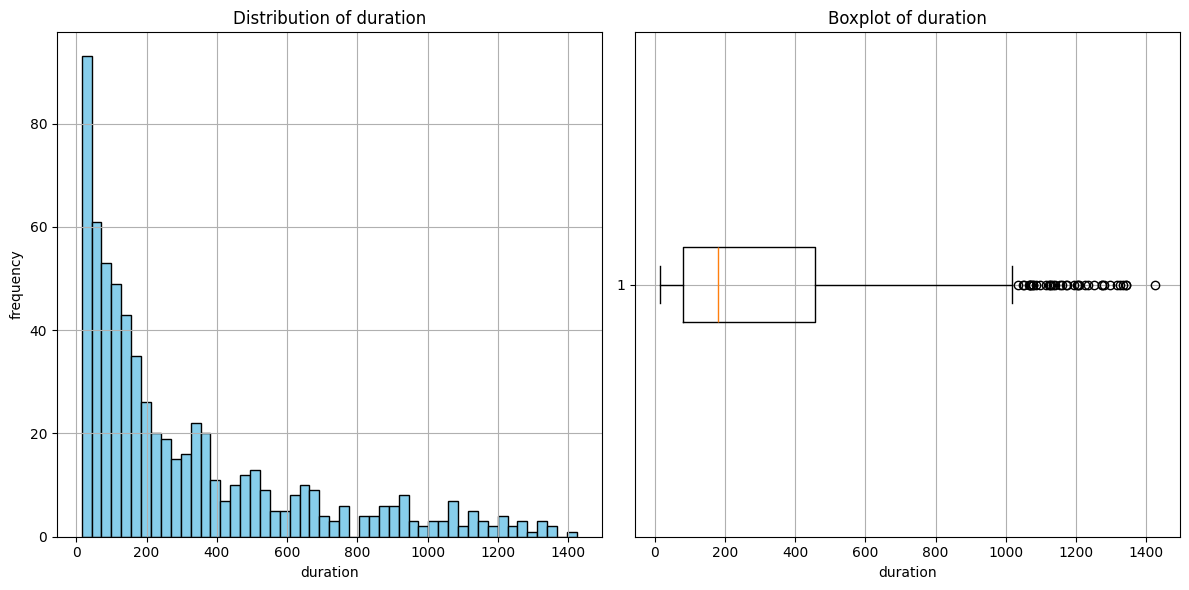

Summary Statistics:

Mean duration: 313.566
Median duration: 180.392
Mode duration: 31.417

10% Quartile: 32.835
25% Quartile (Q1): 79.754
50% Quartile (Q2 or Median): 180.392
75% Quartile (Q3): 456.175
90% Quartile: 858.377

Minimum duration: 15.25
Maximum duration: 1425.267


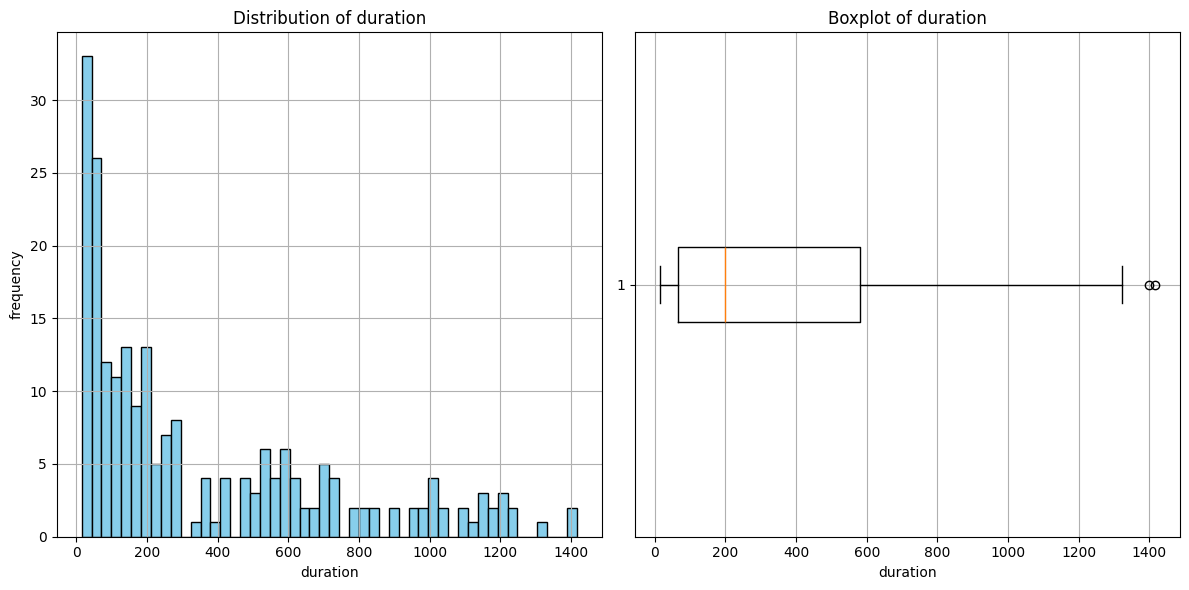

Summary Statistics:

Mean duration: 359.458
Median duration: 198.917
Mode duration: 30.0

10% Quartile: 30.0
25% Quartile (Q1): 66.267
50% Quartile (Q2 or Median): 198.917
75% Quartile (Q3): 580.183
90% Quartile: 974.117

Minimum duration: 15.083
Maximum duration: 1416.5


In [20]:
# Extract day of the week (0 = Monday, 6 = Sunday)
df['day_of_week'] = df['started_at'].dt.dayofweek

# Split DataFrame into weekdays and weekends
weekdays_df = df[df['day_of_week'] < 5]  # Monday to Friday (weekdays)
weekends_df = df[df['day_of_week'] >= 5]  # Saturday and Sunday (weekends)

# Drop the 'day_of_week' column if not needed
weekdays_df.drop(columns=['day_of_week'], inplace=True)
weekends_df.drop(columns=['day_of_week'], inplace=True)

da.distribution(df=weekdays_df, col_name='duration', minutes = True)
da.distribution(df=weekends_df, col_name='duration', minutes = True)

### 7 Visualizing the Number of Potential Parking Events
According to the duration analysis performed let us calculat ethe potential parking events using time thershold. <br>
After that let us grop them by days of week and visualize them.

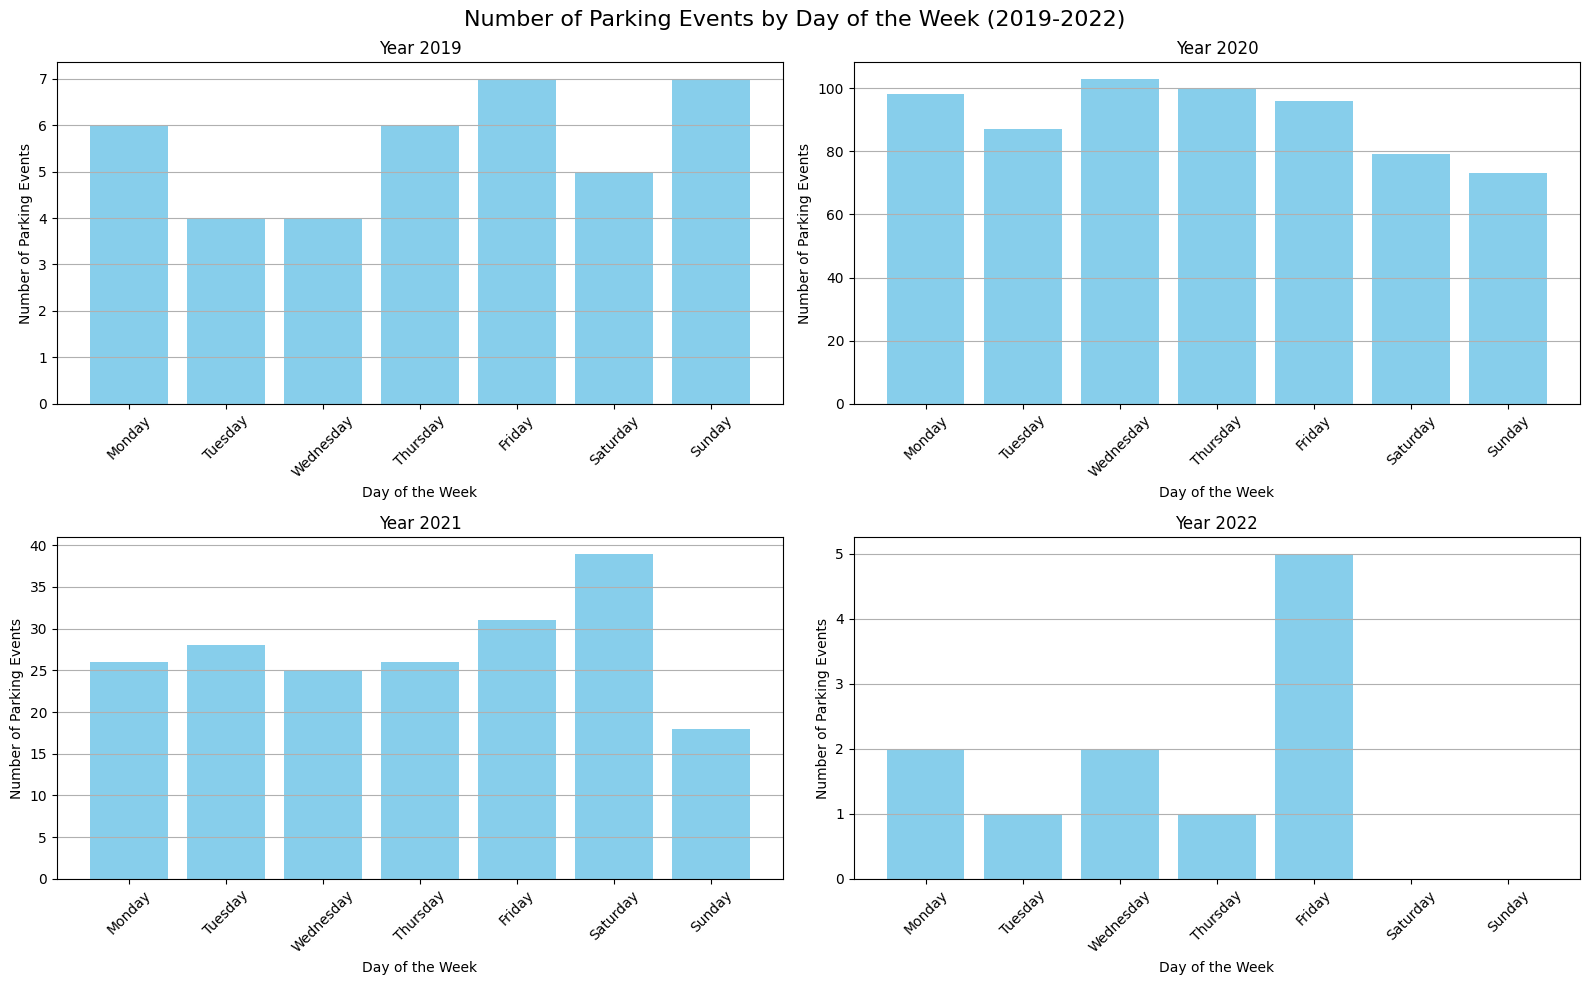

In [9]:
import matplotlib.pyplot as plt

df = parking_durations

# Define the years
years = [2019, 2020, 2021, 2022]
days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Initialize subplots
fig, axs = plt.subplots(2, 2, figsize=(16, 10))
fig.suptitle('Number of Parking Events by Day of the Week (2019-2022)', fontsize=16)

# Iterate over each year and create a bar plot
for i, year in enumerate(years):
    # Filter DataFrame for the current year
    year_df = df[df['started_at'].dt.year == year]
    
    # Create an array to store counts for each day of the week
    parking_counts = []
    
    # Iterate over each day of the week
    for day in range(7):
        # Filter rows for the current day of the week
        day_df = year_df[year_df['started_at'].dt.dayofweek == day]
        # Append the count of parking events to the list
        parking_counts.append(len(day_df))
    
    # Plot the bar chart in the corresponding subplot
    axs[i//2, i%2].bar(days_of_week, parking_counts, color='skyblue')
    axs[i//2, i%2].set_title(f'Year {year}')
    axs[i//2, i%2].set_xlabel('Day of the Week')
    axs[i//2, i%2].set_ylabel('Number of Parking Events')
    axs[i//2, i%2].grid(axis='y')
    axs[i//2, i%2].tick_params(axis='x', rotation=45)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()
